In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=5, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# 3. Define the ANN model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  # Output layer for regression
        )

    def forward(self, x):
        return self.network(x)

model = RegressionModel(input_dim=5)

# 4. Loss and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 5. Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        model.eval()
        val_loss = criterion(model(X_test), y_test)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {val_loss.item():.4f}")

# 6. Final Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    final_loss = criterion(predictions, y_test)
    print(f"\nFinal Test Loss (MSE): {final_loss.item():.4f}")


Epoch 10/100, Train Loss: 12317.6426, Test Loss: 14864.3975
Epoch 20/100, Train Loss: 7470.6826, Test Loss: 8458.7539
Epoch 30/100, Train Loss: 820.1852, Test Loss: 733.7411
Epoch 40/100, Train Loss: 879.6731, Test Loss: 653.5015
Epoch 50/100, Train Loss: 423.0161, Test Loss: 403.6689
Epoch 60/100, Train Loss: 320.2485, Test Loss: 250.2781
Epoch 70/100, Train Loss: 302.0620, Test Loss: 268.8533
Epoch 80/100, Train Loss: 272.0784, Test Loss: 232.6828
Epoch 90/100, Train Loss: 263.3883, Test Loss: 224.0696
Epoch 100/100, Train Loss: 257.1490, Test Loss: 224.5095

Final Test Loss (MSE): 224.5095


In [4]:
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_output = model(X_test)
        val_loss = criterion(val_output, y_test)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {val_loss.item():.4f}")


Epoch 10/100, Train Loss: 251.0745, Test Loss: 212.5592
Epoch 20/100, Train Loss: 245.7687, Test Loss: 211.7366
Epoch 30/100, Train Loss: 241.1680, Test Loss: 207.2715
Epoch 40/100, Train Loss: 237.1371, Test Loss: 204.2306
Epoch 50/100, Train Loss: 233.4185, Test Loss: 202.4857
Epoch 60/100, Train Loss: 230.0486, Test Loss: 199.9254
Epoch 70/100, Train Loss: 227.1138, Test Loss: 198.0212
Epoch 80/100, Train Loss: 224.5760, Test Loss: 196.5368
Epoch 90/100, Train Loss: 222.3281, Test Loss: 195.3523
Epoch 100/100, Train Loss: 220.2911, Test Loss: 194.4220


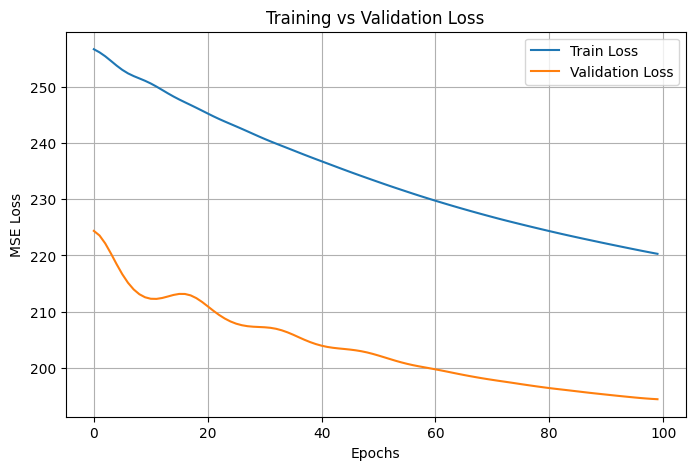

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


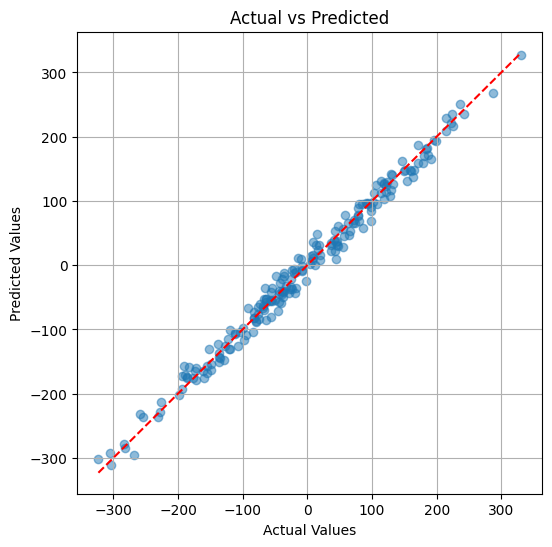

In [6]:
model.eval()
with torch.no_grad():
    predictions = model(X_test).numpy()
    true_values = y_test.numpy()

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(true_values, predictions, alpha=0.5)
plt.plot([true_values.min(), true_values.max()],
         [true_values.min(), true_values.max()],
         color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [8]:
def create_data(slope, N=50):
    x = np.linspace(-1, 1, N)
    y = slope * x + np.random.randn(N) / 2
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


In [9]:
def train_model(x, y, epochs=100):
    model = nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        final_pred = model(x)
        final_loss = loss_fn(final_pred, y).item()
        corr = pearsonr(final_pred.squeeze().numpy(), y.squeeze().numpy())[0]

    return final_loss, corr


In [10]:
slopes = np.linspace(-2, 2, 21)
repeats = 50

avg_losses = []
avg_corrs = []

for slope in slopes:
    losses = []
    corrs = []
    for _ in range(repeats):
        x, y = create_data(slope)
        loss, corr = train_model(x, y)
        losses.append(loss)
        corrs.append(corr)
    
    avg_losses.append(np.mean(losses))
    avg_corrs.append(np.mean(corrs))


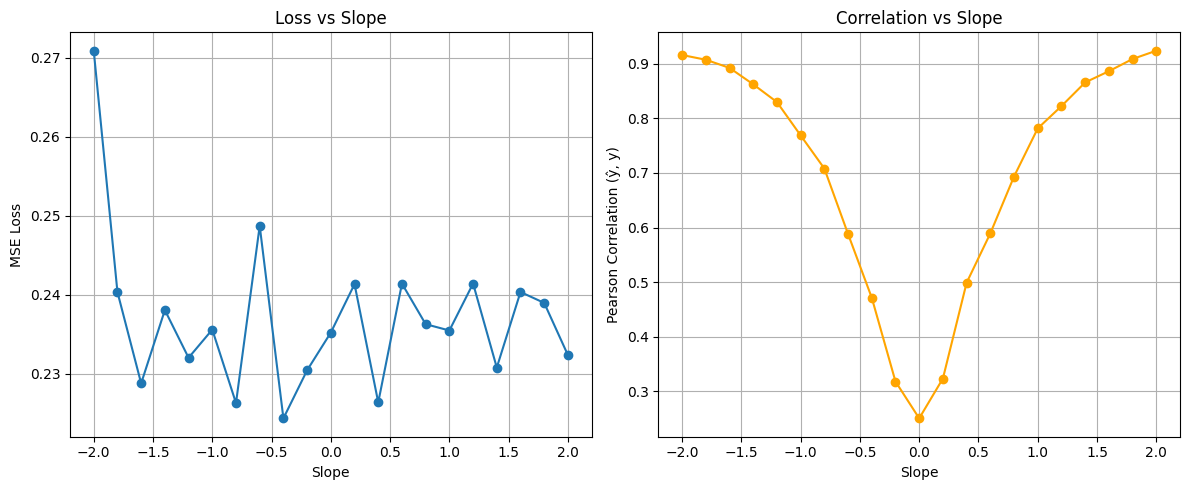

In [11]:
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(slopes, avg_losses, marker='o')
plt.title("Loss vs Slope")
plt.xlabel("Slope")
plt.ylabel("MSE Loss")
plt.grid(True)

# Correlation Plot
plt.subplot(1, 2, 2)
plt.plot(slopes, avg_corrs, marker='o', color='orange')
plt.title("Correlation vs Slope")
plt.xlabel("Slope")
plt.ylabel("Pearson Correlation (ŷ, y)")
plt.grid(True)

plt.tight_layout()
plt.show()


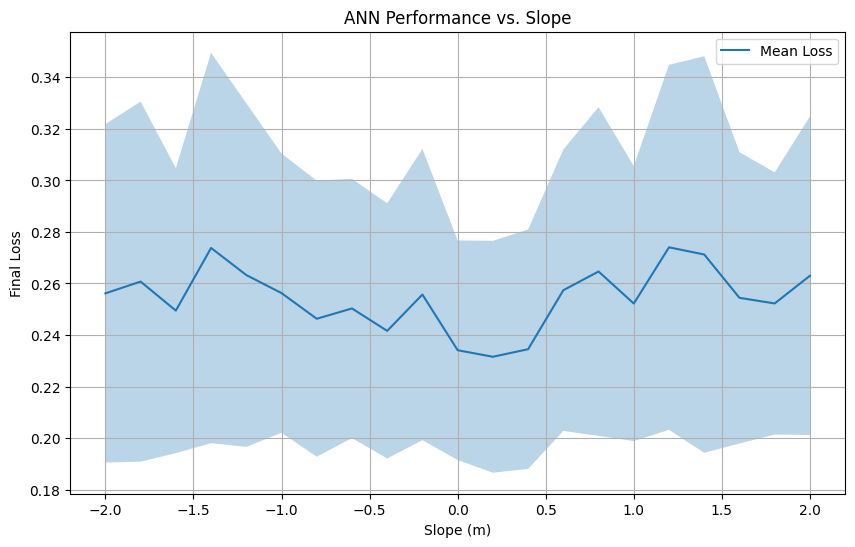

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ========== Function to create synthetic data ==========
def create_data(m, N=50):
    x = torch.rand(N, 1) * 2 - 1  # Range [-1, 1]
    y = m * x + 0.5 * torch.randn(N, 1)
    return x, y

# ========== Define a simple ANN model ==========
class ANNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.net(x)

# ========== Function to train the model ==========
def train_model(x, y, epochs=200, lr=0.01):
    model = ANNModel()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        y_pred = model(x)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model, loss.item()

# ========== Parametric experiment ==========
def run_experiment():
    slopes = np.linspace(-2, 2, 21)
    runs = 50

    all_losses = []

    for m in slopes:
        run_losses = []
        for _ in range(runs):
            x, y = create_data(m)
            model, final_loss = train_model(x, y)
            run_losses.append(final_loss)
        all_losses.append(run_losses)

    return slopes, np.array(all_losses)

# ========== Run the experiment and plot ==========
slopes, losses = run_experiment()

# ========== Plot results ==========
mean_losses = losses.mean(axis=1)
std_losses = losses.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(slopes, mean_losses, label='Mean Loss')
plt.fill_between(slopes, mean_losses - std_losses, mean_losses + std_losses, alpha=0.3)
plt.xlabel("Slope (m)")
plt.ylabel("Final Loss")
plt.title("ANN Performance vs. Slope")
plt.grid(True)
plt.legend()
plt.show()
